In [1]:
import os
import sys
import numpy as np
from skimage import io
import SimpleITK as sitk
from scipy import ndimage
import matplotlib
from matplotlib import pyplot as plt

In [2]:
def compare_two_images(img1, img2):
    plt.figure(figsize=[20,20])
    plt.imshow(img1,cmap='Blues')
    plt.imshow(img2,alpha=0.5,cmap='Reds')
    
def pad_volume(volume, padto):
    re = (padto[2] - volume.shape[2]) // 1
    ce = (padto[1] - volume.shape[1]) // 1
    return np.pad(volume, [[0, 0], [0, ce], [0, re]], constant_values=(0))

In [3]:
DATA = '/net/birdstore/Active_Atlas_Data/data_root/brains_info/registration'
fixed_path = os.path.join(DATA, 'Allen_25um_sagittal.tif')
moving_path = os.path.join(DATA, 'Atlas_25um_sagittal.tif')

In [5]:
MOVING_CROP = 50
fixed_volume = io.imread(fixed_path)
moving_volume = io.imread(moving_path)
print(f'fixed shape={fixed_volume.shape}')
print(f'moving shape={moving_volume.shape}')
moving_volume = moving_volume[:,MOVING_CROP:500, MOVING_CROP:725]
print(f'cropped moving shape={moving_volume.shape}')
#padded_fixed = pad_volume(fixed_volume, cropped_moving.shape)
#print(f'padded fixed shape={padded_fixed.shape}')

fixed shape=(456, 450, 675)
moving shape=(447, 586, 790)
cropped moving shape=(447, 450, 675)


In [10]:
savepath = os.path.join(DATA, 'Atlas_25um_sagittal.tif')
io.imsave(savepath, moving_volume)

In [6]:
offset = 0
fixed_midpoint = fixed_volume.shape[0] // 2 - offset
fixed_image = fixed_volume[fixed_midpoint,:,:]
moving_midpoint = moving_volume.shape[0] // 2 - offset
moving_image = moving_volume[moving_midpoint,:,:]
print(f'Fixed image shape={fixed_image.shape} dtype={fixed_image.dtype}')
print(f'moving image shape={moving_image.shape} dtype={moving_image.dtype}')

Fixed image shape=(450, 675) dtype=uint16
moving image shape=(450, 675) dtype=float32


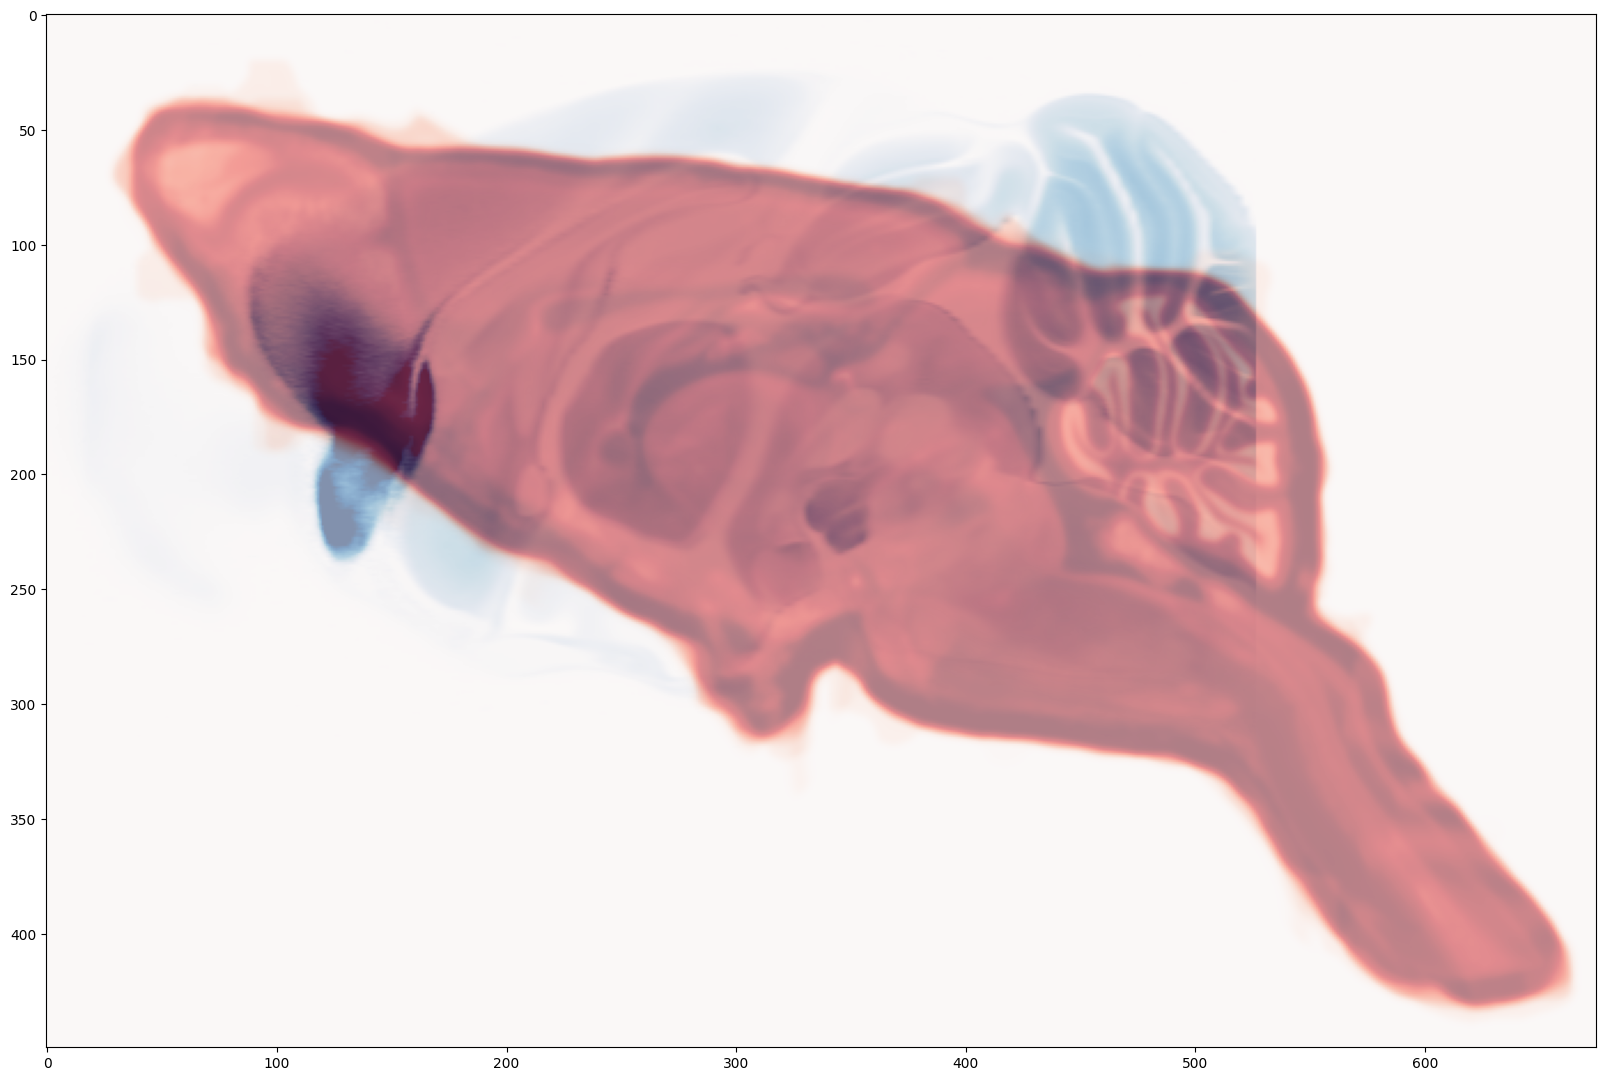

In [7]:
# 1- blue is fixed (Allen), 2 red is moving (DKXX)
compare_two_images(fixed_image, moving_image)

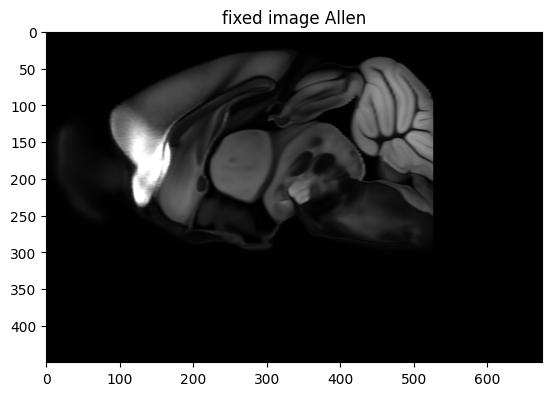

In [8]:
plt.title('fixed image Allen')
plt.imshow(fixed_image, cmap="gray")
plt.show()

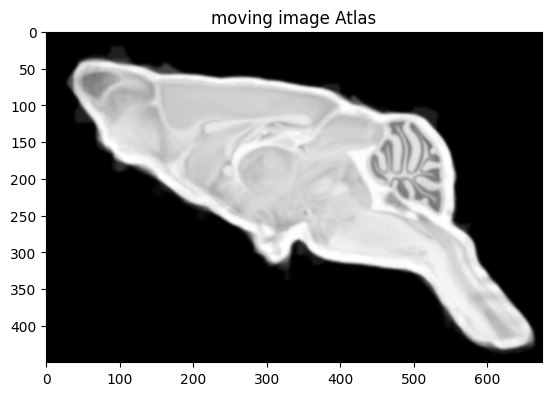

In [9]:
#ri = sitk.GetArrayFromImage(registered_image)
plt.title('moving image Atlas')
plt.imshow(moving_image, cmap="gray")
plt.show()

In [ ]:
plt.title('registered image')
plt.imshow(fixed_image, cmap="gray")
plt.show()